## IBM Coursera Data Science Capstone Project Week 3

## Question 1

### First import the necessary libraries

In [153]:
# used to make tab autocomplete work faster 
%config Completer.use_jedi = False

In [154]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [155]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
url

'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

**Get the html contents in string format**

In [156]:
data = requests.get(url).text
# data

**Convert data to a Soup Object**

In [157]:
soup = BeautifulSoup(data, 'html.parser')
# soup

In [158]:
table = soup.find('table')
table_contents = []
for i,row in enumerate(table.findAll('td')):
    cell = {}
    if 'not assigned' in row.span.text.lower():
        pass
    else:
#         df_torneigh.iloc[i,'PostalCode'] = row.text[:3]
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = row.span.text.split('(')[0]
        cell['Neighborhood'] = row.span.text.split('(')[1].replace(' /',',').replace(')',' ').strip(')')
        table_contents.append(cell)
df = pd.DataFrame(table_contents)

In [159]:
df[df['Borough'].str.len() > 20]

,PostalCode,Borough,Neighborhood
35,M4J,East YorkEast Toronto,The Danforth East
76,M7R,MississaugaCanada Post Gateway Processing Centre,Enclave of L4W
92,M5W,Downtown TorontoStn A PO Boxes25 The Esplanade,Enclave of M5E
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L


In [160]:
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [161]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


**Shape of the dataframe**

In [162]:
df.shape

(103, 3)

## Question 2

**Try to get the location data using geocoder**

In [163]:
# import geocoder # import geocoder

# initialize your variable to None
# lat_lng_coords = None

# loop until you get the coordinates
# while(lat_lng_coords is None):
#     g = geocoder.google('{}, Toronto, Ontario'.format('M7A'))
#     lat_lng_coords = g.latlng

# latitude = lat_lng_coords[0]
# longitude = lat_lng_coords[1]

**Geocoder module did not work. So get the data from the provided csv**

In [164]:
loc_df = pd.read_csv('Geospatial_Coordinates.csv')
loc_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


**Merge the two dataframes**

In [165]:
df = pd.merge(df,loc_df,left_on='PostalCode',right_on='Postal Code')
df.head()

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,M7A,43.662301,-79.389494


**Drop the duplicate Postal Code column**

In [166]:
df.drop('Postal Code',axis=1,inplace=True)

**Question 2 final result:**

In [167]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


## Question 3

**import the necessary libraries**

In [168]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import io
from PIL import Image

print('Libraries imported.')

Libraries imported.


In [179]:
CLIENT_ID = 'T10NG1UBRQCPQ0DFAHQCSLH30TUEH5YQXX2XEG51LXKXLR2Z'
CLIENT_SECRET = 'WXWWRBQTNNFZ4LXWBQRZEDEGMYMWJEQSVDCULUZX4WRMTF1R'
VERSION = '20180605'
LIMIT = 100

**Function to get the nearby venues**

In [180]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Filter out the dataframe so that we only get rows which have 'Toronto' in the Borough column**

In [171]:
df_tor = df[df['Borough'].str.contains('toronto',case=False)]
df_tor.reset_index()
print(df_tor.shape)
df_tor.head()

(39, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


**Find the geographical coordinates of Toronto**

In [172]:
address = 'Toronto, ON'
geolocator = Nominatim(user_agent='toronto_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'The geographical coordinates of Toronto are {latitude},{longitude}')

The geographical coordinates of Toronto are 43.6534817,-79.3839347


In [173]:
toronto_map = folium.Map(location=[latitude,longitude],zoom_start=12)

for lat,lng,bor,neigh in zip(df_tor['Latitude'],df_tor['Longitude'],df_tor['Borough'],df_tor['Neighborhood']):
    label_text = '{}- {}'.format(bor,neigh)
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup = label,
        color='blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.6,
        parse_html = False
    ).add_to(toronto_map)

toronto_map

**Save the folium map as a png in github so the user can check if the result is correct**

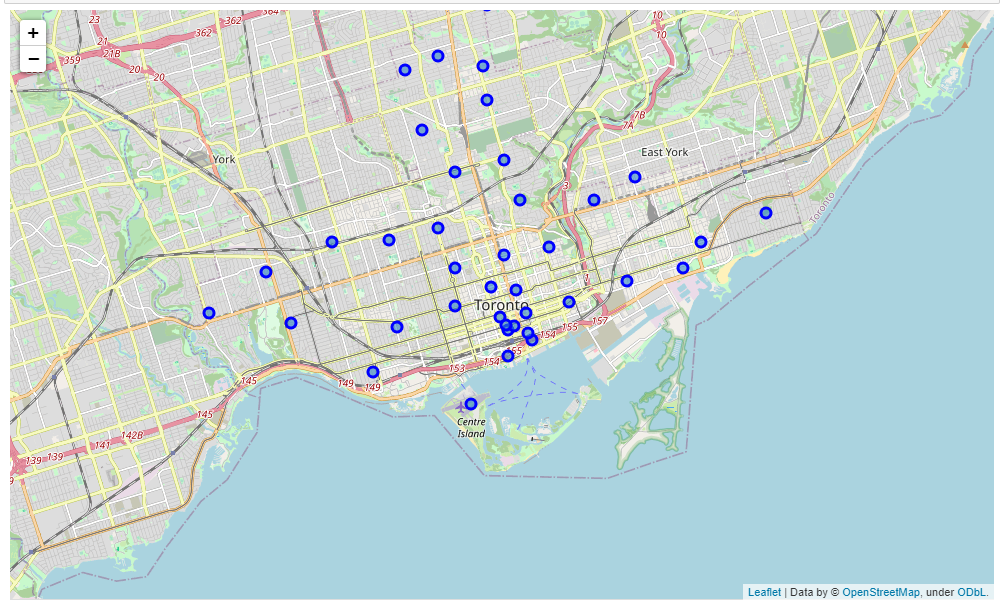

In [177]:
im = Image.open('toronto_map_with_neighborhoods.PNG')
im

**Using the df_tor dataframe, get the venues that are near these neighborhoods**

In [194]:
df_torvenues = getNearbyVenues(names = df_tor['Neighborhood'],latitudes=df_tor['Latitude'],longitudes=df_tor['Longitude'])

Regent Park, Harbourfront 
Garden District, Ryerson 
St. James Town 
The Beaches 
Berczy Park 
Central Bay Street 
Christie 
Richmond, Adelaide, King 
Dufferin, Dovercourt Village 
The Danforth  East 
Harbourfront East, Union Station, Toronto Islands 
Little Portugal, Trinity 
The Danforth West, Riverdale 
Toronto Dominion Centre, Design Exchange 
Brockton, Parkdale Village, Exhibition Place 
India Bazaar, The Beaches West 
Commerce Court, Victoria Hotel 
Studio District 
Lawrence Park 
Roselawn 
Davisville North 
Forest Hill North & West 
High Park, The Junction South 
North Toronto West 
The Annex, North Midtown, Yorkville 
Parkdale, Roncesvalles 
Davisville 
University of Toronto, Harbord 
Runnymede, Swansea 
Moore Park, Summerhill East 
Kensington Market, Chinatown, Grange Park 
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park 
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport 
Rosedale 
Enclave of M5E 
St. J

In [196]:
print(toronto_venues.shape)
df_torvenues.head()

(1592, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


**Check how many venues were returned for each neighborhood**

In [197]:
df_torvenues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",13,13,13,13,13,13
Central Bay Street,64,64,64,64,64,64
Christie,15,15,15,15,15,15
Church and Wellesley,80,80,80,80,80,80
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,37,37,37,37,37,37
Davisville North,9,9,9,9,9,9


**Check how many unique categories are there**

In [192]:
print('There are {} unique categories'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 unique categories


**Perform one-hot encoding to get the dummy values for Venue Category**

In [198]:
df_onehot_venue = pd.get_dummies(df_torvenues[['Venue Category']],prefix='',prefix_sep='')

**Add the Neighborhood column to the df_onehot_venue dataframe and position it correctly**

In [216]:
#add Neighborhood column to the dataframe
df_onehot_venue['Neighborhood'] = df_torvenues['Neighborhood']

#Move the Neighborhood column to the first column
fixed_columns = ['Neighborhood'] + [col for col in df_onehot_venue.columns if col != 'Neighborhood']

#Apply the fixed columns
df_onehot_venue = df_onehot_venue[fixed_columns]

df_onehot_venue.head()


,Neighborhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
df_onehot_venue.shape

(1592, 235)

**Let's check the mean of the frequency of each venue category per Neighborhood**

In [221]:
toronto_grouped = df_onehot_venue.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.076923,0.076923,0.076923,0.153846,0.153846,0.076923,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,Central Bay Street,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.015625
4,Christie,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [222]:
toronto_grouped.shape

(39, 235)

**Print each neighborhood with the top 5 categories**

In [223]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park ----
         venue  freq
0  Coffee Shop  0.05
1       Bakery  0.05
2   Restaurant  0.04
3     Pharmacy  0.04
4     Beer Bar  0.04


----Brockton, Parkdale Village, Exhibition Place ----
            venue  freq
0            Café  0.14
1  Breakfast Spot  0.09
2     Coffee Shop  0.09
3          Bakery  0.05
4       Pet Store  0.05


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport ----
             venue  freq
0   Airport Lounge  0.15
1  Airport Service  0.15
2  Harbor / Marina  0.08
3          Airport  0.08
4    Boat or Ferry  0.08


----Central Bay Street ----
                venue  freq
0         Coffee Shop  0.17
1                Café  0.05
2  Italian Restaurant  0.05
3      Sandwich Place  0.05
4     Bubble Tea Shop  0.03


----Christie ----
           venue  freq
0  Grocery Store  0.27
1           Café  0.20
2           Park  0.13
3     Baby Store  0.07
4      Nightclub  0.07


----Church and Wellesley --

**Get the 10 most frequent venue categories per neighborhood**

In [346]:
num_to_get = 10
tabcont = []
asf = ''
cat_cols = list(map(lambda x: 'Category {}'.format(x+1),range(num_to_get)))
for neigh in (toronto_grouped['Neighborhood']):
    row = {}
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == neigh].T
    temp.columns = ['freq']
    temp
    temp1 = temp.iloc[1:].sort_values(by='freq',ascending=False).iloc[:num_to_get]
    temp2 = temp1.index.values
    row['Neighborhood'] = neigh
    for i in range(num_to_get):
        row[cat_cols[i]] = temp2[i]
    tabcont.append(row)
toronto_venues_sorted = pd.DataFrame(tabcont)

In [347]:
toronto_venues_sorted

,Neighborhood,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,Berczy Park,Coffee Shop,Bakery,Restaurant,Pharmacy,Beer Bar,Cocktail Bar,Farmers Market,Seafood Restaurant,Cheese Shop,Fish Market
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Bakery,Pet Store,Performing Arts Venue,Restaurant,Nightclub,Climbing Gym,Burrito Place
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Harbor / Marina,Airport,Boat or Ferry,Sculpture Garden,Rental Car Location,Coffee Shop,Airport Terminal,Airport Food Court
3,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Salad Place,Dessert Shop,Park
4,Christie,Grocery Store,Café,Park,Baby Store,Nightclub,Candy Store,Italian Restaurant,Restaurant,Coffee Shop,Movie Theater
5,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Men's Store,Bubble Tea Shop,Pub
6,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Japanese Restaurant,Deli / Bodega,Seafood Restaurant,Bakery
7,Davisville,Pizza Place,Dessert Shop,Sandwich Place,Coffee Shop,Sushi Restaurant,Gym,Café,Italian Restaurant,Park,Pharmacy
8,Davisville North,Breakfast Spot,Park,Gym / Fitness Center,Gym,Playground,Hotel,Sandwich Place,Food & Drink Shop,Department Store,Miscellaneous Shop
9,"Dufferin, Dovercourt Village",Pharmacy,Bakery,Bus Stop,Bank,Music Venue,Supermarket,Middle Eastern Restaurant,Café,Grocery Store,Gym / Fitness Center


**Run k-means clustering to cluster the venue categories into 5 cluster**

In [378]:
X = toronto_grouped.drop('Neighborhood',axis=1)

k_clusters = 5
km = KMeans(init='k-means++',n_clusters=k_clusters,n_init=12,random_state=0)
km.fit(X)

KMeans(n_clusters=5, n_init=12, random_state=0)

**The cluster labels found by the kmeans model**

In [379]:
set(km.labels_)

{0, 1, 2, 3, 4}

In [380]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Merge the labels back to the dataframw with coordinates and neighborhood names**

In [381]:
# toronto_grouped.insert(0,'Cluster Labels',km.labels_)

toronto_merged = pd.merge(df_tor,toronto_grouped,on='Neighborhood')
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Adult Boutique,Airport,Airport Food Court,Airport Gate,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.00,0.00,0.000000,0.022727
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.00,0.0,0.000000,0.01,0.01,0.000000,0.000000
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.011905,0.00,0.00,0.011905,0.000000
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.25,0.0,0.000000,0.00,0.00,0.000000,0.000000
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.017857,0.00,0.00,0.000000,0.000000


**Create map in folium**

In [382]:
toronto_clusters = folium.Map(location=[latitude,longitude],zoom_start=10)

#color scheme
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat,lon,neigh,cluster in zip(toronto_merged['Latitude'],toronto_merged['Longitude'],toronto_merged['Neighborhood'],toronto_merged['Cluster Labels']):
    label = folium.Popup('{}, Cluster {}'.format(neigh,cluster), parse_html=True)
    folium.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7
    ).add_to(toronto_clusters)
    

toronto_clusters

**Final clustered map. Added this as an image because github does not output the folium maps**

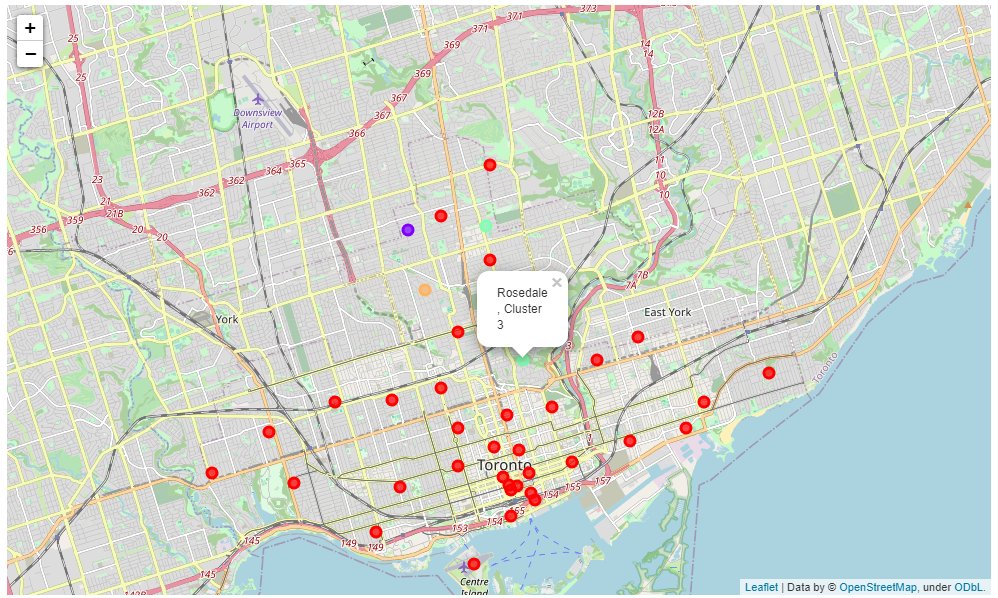

In [383]:
im2 = Image.open('toronto_map_with_clustering.PNG')
im2